In [5]:
import torch.nn as nn

class ReQU(nn.Module):
    
    def __init__(self):
        super(ReQU, self).__init__()

    def forward(self, x):
        
        y = torch.pow(torch.clamp(x,min=0.0), 2)

        return y

In [6]:
import torch
from torch.autograd import Variable
import torch.optim as optim

X = [[[0.01, 0.01],
      [0.01, 0.90],
      [0.90, 0.01],
      [0.95, 0.95]
     ],
     [[0.02, 0.03],
      [0.04, 0.95],
      [0.97, 0.02],
      [0.96, 0.95]
     ]]

Y = [[[0.01],
      [0.90],
      [0.90],
      [0.01]
     ],
     [[0.04],
      [0.97],
      [0.98],
      [0.1]
     ]]


module = nn.Sequential(
        nn.Linear(2,20),
        ReQU(),
        nn.Linear(20,1),
        ReQU())

# Initalize weights
# If we don't initialize the weights properly, we sometimes get stuck in the training phase.
# The output of the network is always zero and the weights are not adjusted properly.
for m in module.modules():
    if isinstance(m, nn.Linear):
        m.weight.data.normal_(0, 0.01)
        m.bias.data.fill_(0.5)
        
criterion = nn.MSELoss()
optimizer = optim.SGD(module.parameters(), lr=0.1)

inputs = Variable(torch.FloatTensor(X[0]))
outputs = module(inputs)

print("Output before training:")
print(outputs)

for epoch in range(10000):
    
    ####### Train with batch 1 #############
    inputs = Variable(torch.FloatTensor(X[0]))
    expected_outputs = Variable(torch.FloatTensor(Y[0]))
    
    # zero the parameter gradients
    optimizer.zero_grad()
    
    outputs = module(inputs)

    loss = criterion(outputs, expected_outputs)
    
    loss.backward()
    optimizer.step()
    
    ####### Train with batch 2 #############
    
    # zero the parameter gradients
    optimizer.zero_grad()
    
    inputs = Variable(torch.FloatTensor(X[1]))
    expected_outputs = Variable(torch.FloatTensor(Y[1]))
    
    # zero the parameter gradients
    optimizer.zero_grad()
    
    outputs = module(inputs)
    loss = criterion(outputs, expected_outputs)
    loss.backward()
    optimizer.step()


print("Done with training")
print()



inputs = Variable(torch.FloatTensor(X[0]))
outputs = module(inputs)

print("Output after training")
print(outputs)


    
    

Output before training:
Variable containing:
 0.2684
 0.2690
 0.2686
 0.2693
[torch.FloatTensor of size 4x1]

Done with training

Output after training
Variable containing:
 0.0289
 0.8986
 0.8921
 0.0550
[torch.FloatTensor of size 4x1]



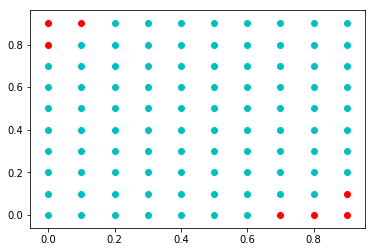

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x_test = []
y_test = []

for i in np.arange(0.0,1.0,0.1):
    for j in np.arange(0.0,1.0,0.1):
        x_test.append(i)
        y_test.append(j)

# Predict output for every input

for i in range(len(x_test)):
    
    inputs = Variable(torch.FloatTensor([x_test[i],y_test[i]]))
    output = module(inputs)
  
    if output.data[0] < 0.5:
        plt.scatter(x_test[i],y_test[i], c='c')
    else:
        plt.scatter(x_test[i],y_test[i], c='r')
    
plt.show()
